In [1]:
import tonic
import tonic.transforms as transforms
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

sensor_size = tonic.datasets.DVSGesture.sensor_size

# Denoise removes isolated, one-off events
# time_window
frame_transform = transforms.Compose([
                                      transforms.ToFrame(sensor_size=sensor_size,
                                                        n_time_bins=100)
                                     ])

trainset = tonic.datasets.DVSGesture(save_to='./data', transform=frame_transform, train=True)
testset = tonic.datasets.DVSGesture(save_to='./data', transform=frame_transform, train=False)

from torch.utils.data import DataLoader
from tonic import MemoryCachedDataset

cached_trainset = MemoryCachedDataset(trainset)
cached_dataloader = DataLoader(cached_trainset)

batch_size = 128
trainloader = DataLoader(cached_trainset, batch_size=batch_size, collate_fn=tonic.collation.PadTensors())
transform = tonic.transforms.Compose([torch.from_numpy,
                                      torchvision.transforms.RandomRotation([-10,10])])

cached_trainset = MemoryCachedDataset(trainset, transform=transform)

# no augmentations for the testset
cached_testset = MemoryCachedDataset(testset)

batch_size = 128
trainloader = DataLoader(cached_trainset, batch_size=batch_size, collate_fn=tonic.collation.PadTensors(batch_first=False), shuffle=True)
testloader = DataLoader(cached_testset, batch_size=batch_size, collate_fn=tonic.collation.PadTensors(batch_first=False))

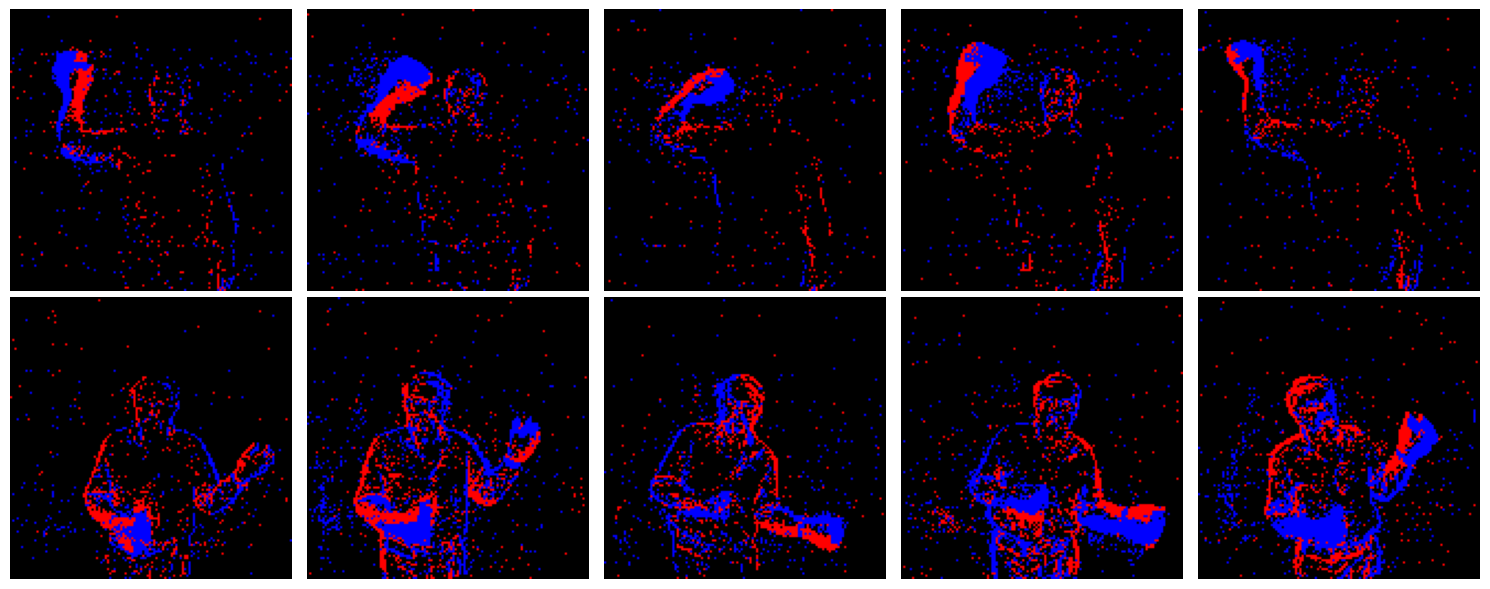

In [ ]:
dvs_gesture_classes = [
    "Hand Clap",
    "Right Hand Wave",
    "Left Hand Wave",
    "Right Arm Clockwise",
    "Right Arm Counter Clockwise",
    "Left Arm Clockwise",
    "Left Arm Counter Clockwise",
    "Arm Roll",
    "Air Drum",
    "Air Guitar",
    "Other"
]

ids = [111, 76]
mults = [2, 10]

# Number of rows and columns for the subplots grid
num_ids = len(ids)
num_images = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_ids, num_images, figsize=(num_images * 3, num_ids * 3))

for j, id in enumerate(ids):
    for i, (images, labels) in enumerate(testloader):
        images = (images > 0).float()
        Image = images[:, id, :, :]
        break

    up_im = Image[:, 0, :, :]
    down_im = Image[:, 1, :, :]

    for i in range(num_images):
        # Create an empty RGB image
        combined_image = np.zeros((128, 128, 3), dtype=np.uint8)

        # Set red channel for the first image
        combined_image[up_im[mults[j]*i] == 1] = [230, 0, 73]

        # Set blue channel for the second image
        combined_image[down_im[mults[j]*i] == 1] = [11, 180, 255]

        # Plot the resulting image in the j-th row and i-th column subplot
        axes[j, i].imshow(combined_image)
        axes[j, i].axis('off')  # Hide axis

# Adjust layout
plt.tight_layout()
# plt.savefig('DVS_GEstures.pdf')
plt.show()